In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Data collection and preprossesing 
data0 = pd.read_excel("Dataset/data0.xlsx")
data1 = pd.read_excel("Dataset/data1.xlsx")
data2 = pd.read_excel("Dataset/data2.xlsx")
data3 = pd.read_excel("Dataset/data3.xlsx")
data4 = pd.read_excel("Dataset/data4.xlsx")
data5 = pd.read_excel("Dataset/data5.xlsx")
data6 = pd.read_excel("Dataset/data6.xlsx")
data7 = pd.read_excel("Dataset/data7.xlsx")

In [3]:
data0.head()

,year,women's age,men's age,family type,area,girl's job,boy's job,marry condition,women married/unmarried,mohor,dowry
0,2013,19,30,rich class,chuadanga,day Labour,businessman,Forced Marriage,Single,387000,Furniture
1,2014,22,40,rich class,Jashore,businessman,businessman,Irrelevant Marriage,Single,391500,Land
2,2013,16,25,rich class,Jhenaidah,day Labour,Service holder,Forced Marriage,Single,364500,car
3,2014,22,34,higher class,Khulna,businessman,businessman,arrange Marriage,Single,214200,456000
4,2017,18,29,rich class,bagerhat,businessman,Service holder,Forced Marriage,Single,423000,home


In [4]:
#create a function to get all columns from each xlsx file.
def get_column_names(file_path):
    """Helper function to read column names from an Excel file."""
    try:
        df = pd.read_excel(file_path, nrows=0)  # Read only the header (column names)
        return df.columns.tolist()
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return None

In [5]:
#create a function to compare all columns from each xlsx file.
def check_xlsx_columns(directory):
    """Function to compare column names of all xlsx files in the given directory."""
    column_names = None
    first_file = None
    
    # Loop through all files in the directory
    for file in os.listdir(directory):
        if file.endswith(".xlsx"):
            file_path = os.path.join(directory, file)
            current_columns = get_column_names(file_path)
            
            if current_columns is None:
                return False  # If there was an error reading the file
            
            # If this is the first file, set the column names
            if column_names is None:
                column_names = current_columns
                first_file = file
            else:
                # Compare the current file's columns to the first file's columns
                if column_names != current_columns:
                    print(f"Column mismatch between {first_file} and {file}")
                    return False
    
    return True

In [6]:
directory = r"D:\\ML projects\\Dowry-Data-Bangladesh\\Dataset\\"
result = check_xlsx_columns(directory)
if result:
    print("All files have identical column names.")
else:
    print("Files have different column names.")

All files have identical column names.


In [7]:
def concat_xlsx_files(directory, output_file):
    """Function to concatenate all xlsx files in a directory into one file."""
    dfs = []
    
    # Loop through all files in the directory
    for file in os.listdir(directory):
        if file.endswith(".xlsx"):
            file_path = os.path.join(directory, file)
            
            try:
                # Read the Excel file into a DataFrame
                df = pd.read_excel(file_path)
                dfs.append(df)
                print(f"Loaded {file} successfully.")
            except Exception as e:
                print(f"Error reading {file_path}: {e}")
                return False

    # Concatenate all DataFrames
    if dfs:
        final_df = pd.concat(dfs, ignore_index=True)
        
        # Save the concatenated DataFrame to an Excel file
        try:
            final_df.to_excel(output_file, index=False)
            print(f"Successfully saved concatenated file to {output_file}.")
            return True
        except Exception as e:
            print(f"Error saving to {output_file}: {e}")
            return False
    else:
        print("No data to concatenate.")
        return False

In [8]:
output_file = "Dowry-Data-Bangladesh.xlsx"
concat_xlsx_files(directory, output_file)

Loaded data0.xlsx successfully.
Loaded data1.xlsx successfully.
Loaded data2.xlsx successfully.
Loaded data3.xlsx successfully.
Loaded data4.xlsx successfully.
Loaded data5.xlsx successfully.
Loaded data6.xlsx successfully.
Loaded data7.xlsx successfully.
Successfully saved concatenated file to Dowry-Data-Bangladesh.xlsx.


True

In [63]:
data = pd.read_excel("Dowry-Data-Bangladesh.xlsx",parse_dates=["year"])

In [64]:
data.head()

,year,women's age,men's age,family type,area,girl's job,boy's job,marry condition,women married/unmarried,mohor,dowry
0,2013-01-01,19,30,rich class,chuadanga,day Labour,businessman,Forced Marriage,Single,387000,Furniture
1,2014-01-01,22,40,rich class,Jashore,businessman,businessman,Irrelevant Marriage,Single,391500,Land
2,2013-01-01,16,25,rich class,Jhenaidah,day Labour,Service holder,Forced Marriage,Single,364500,car
3,2014-01-01,22,34,higher class,Khulna,businessman,businessman,arrange Marriage,Single,214200,456000
4,2017-01-01,18,29,rich class,bagerhat,businessman,Service holder,Forced Marriage,Single,423000,home


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2433 entries, 0 to 2432
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   year                     2433 non-null   datetime64[ns]
 1   women's age              2433 non-null   int64         
 2   men's age                2433 non-null   int64         
 3   family type              2433 non-null   object        
 4   area                     2433 non-null   object        
 5   girl's job               2433 non-null   object        
 6   boy's job                2433 non-null   object        
 7   marry condition          2433 non-null   object        
 8   women married/unmarried  2433 non-null   object        
 9   mohor                    2433 non-null   int64         
 10  dowry                    2433 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 209.2+ KB


In [66]:
data.shape

(2433, 11)

In [67]:
data.sort_values(by="year",inplace=True,ignore_index=True)

In [68]:
data.head()

,year,women's age,men's age,family type,area,girl's job,boy's job,marry condition,women married/unmarried,mohor,dowry
0,2013-01-01,19,30,rich class,chuadanga,day Labour,businessman,Forced Marriage,Single,387000,Furniture
1,2013-01-01,21,33,rich class,naogaon,businessman,service holder,arrange marriage,single,364500,furniture
2,2013-01-01,18,32,Higher Class,Jhalokati,Service Holder,Businessman,Irrelevant Marriage,Single,231000,No Property
3,2013-01-01,22,36,Higher Middle Class,Pirojpur,Entrepreneur,Businessman,Irrelevant Marriage,Single,252000,Furniture
4,2013-01-01,19,36,rich class,naogaon,businessman,businessman,irrelevant marriage,single,387000,furniture


In [69]:
data.tail()

,year,women's age,men's age,family type,area,girl's job,boy's job,marry condition,women married/unmarried,mohor,dowry
2428,2018-01-01,21,27,higher class,Netrokona,Entrepreneur,Entrepreneur,arrange marriage,Single,696000,702000
2429,2018-01-01,19,29,lower middle class,Netrokona,businessman,farmer,arrange marriage,Single,352000,551600
2430,2018-01-01,21,36,rich class,Sherpur,businessman,Service holder,Irrelevant marriage,Single,1044000,aurnaments
2431,2018-01-01,20,36,higher middle class,Sherpur,Service holder,Entrepreneur,Irrelevant marriage,Single,624000,aurnaments
2432,2018-01-01,25,42,rich class,habiganj,service holder,entrepreneur,Irrelevant marriage,Widow,1470000,furniture


In [70]:
#deleting duplicates values if present.
data.drop_duplicates(inplace=True)

In [71]:
data.isnull().sum()

year                       0
women's age                0
men's age                  0
family type                0
area                       0
girl's job                 0
boy's job                  0
marry condition            0
women married/unmarried    0
mohor                      0
dowry                      0
dtype: int64

In [72]:
#stats of data
data.describe()

,year,women's age,men's age,mohor
count,2433,2433.000000,2433.000000,2.433000e+03
mean,2016-01-20 03:24:11.541306880,20.439786,32.376079,4.362927e+05
min,2013-01-01 00:00:00,16.000000,25.000000,4.000000e+04
25%,2015-01-01 00:00:00,18.000000,29.000000,2.310000e+05
50%,2017-01-01 00:00:00,20.000000,32.000000,3.690000e+05
75%,2017-01-01 00:00:00,22.000000,36.000000,5.500000e+05
max,2018-01-01 00:00:00,25.000000,42.000000,1.485000e+06
std,NaN,2.463836,4.830128,3.185015e+05


**women's age-**<br>
    **- Average age of marriage : 20**<br>
    **- Minimum age of marriage : 16**<br>
    **- Maximum age of marriage : 25**<br>

**men's age-**<br>
    **- Average age of marriage : 32**<br>
    **- Minimum age of marriage : 25**<br>
    **- Maximum age of marriage : 42**<br>

In [73]:
#function to create countplots with percentage of values 
def countplot(data,column):
    ax = sns.countplot(x=column,data=data,palette='colorblind',hue=column,legend=False)
    # get the total count of the women's age column
    total = data[column].count()

    # annotate the bars with fmt from matplotlib v3.7.0
    for c in ax.containers:
        ax.bar_label(c, fmt=lambda x: f'{(x/total)*100:0.1f}%')
    plt.tight_layout()
    plt.show()

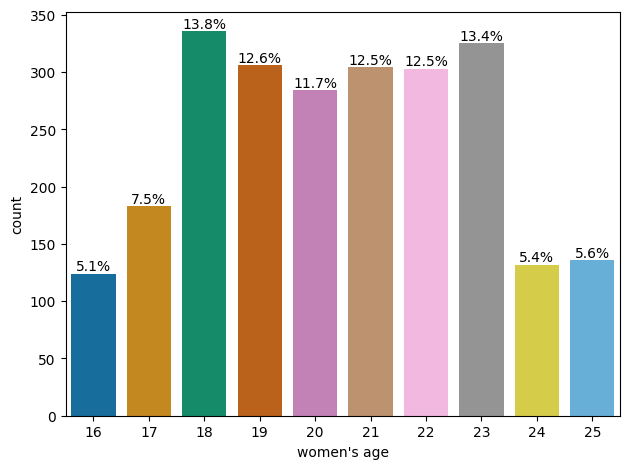

In [74]:
countplot(data,"women's age")

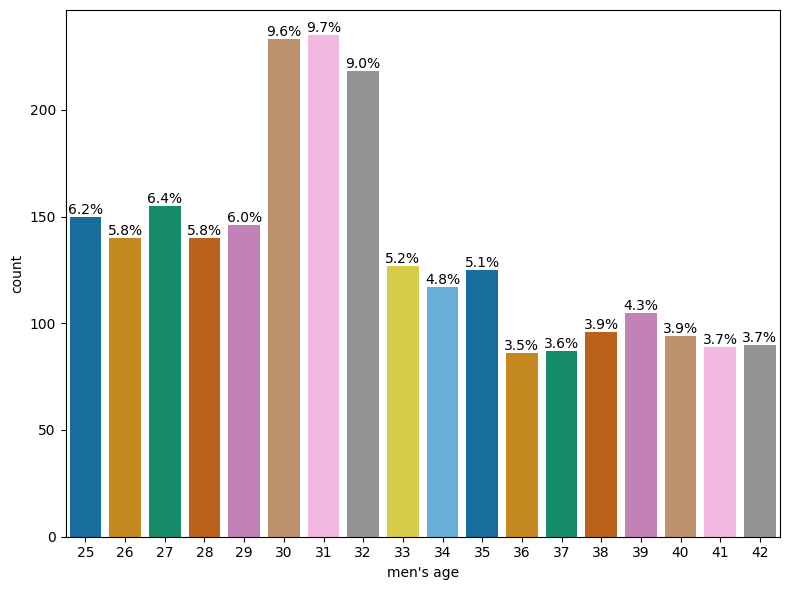

In [75]:
plt.figure(figsize=(8,6))
countplot(data,"men's age")

In [76]:
#function for checking outliers in columns
def detect_outliers_iqr(df, column):
    """
    Detects outliers in a specified column of a DataFrame using the IQR method.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to check for outliers.
    column (str): The name of the column to check for outliers.
    
    Returns:
    pd.DataFrame: A DataFrame containing only the outliers.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Outliers are the values outside the IQR range
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    return outliers


In [77]:
detect_outliers_iqr(data,"women's age")

Lower Bound: 12.0, Upper Bound: 28.0


,year,women's age,men's age,family type,area,girl's job,boy's job,marry condition,women married/unmarried,mohor,dowry


In [78]:
detect_outliers_iqr(data,"men's age")

Lower Bound: 18.5, Upper Bound: 46.5


,year,women's age,men's age,family type,area,girl's job,boy's job,marry condition,women married/unmarried,mohor,dowry


In [84]:
detect_outliers_iqr(data,"mohor").shape

Lower Bound: -247500.0, Upper Bound: 1028500.0


(231, 12)

In [85]:
def detect_outliers_zscore(df, column, threshold=3):
    """
    Detects outliers in a specified column of a DataFrame using the Z-score method.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to check for outliers.
    column (str): The name of the column to check for outliers.
    threshold (float): The Z-score threshold to consider an outlier (default is 3).
    
    Returns:
    pd.DataFrame: A DataFrame containing only the outliers.
    """
    mean_col = df[column].mean()
    std_col = df[column].std()
    
    # Calculate the Z-scores
    df['Z_score'] = (df[column] - mean_col) / std_col
    
    # Outliers are values with Z-scores greater than the threshold (absolute value)
    outliers = df[np.abs(df['Z_score']) > threshold]
    
    return outliers


In [89]:
detect_outliers_zscore(data,"women's age")

,year,women's age,men's age,family type,area,girl's job,boy's job,marry condition,women married/unmarried,mohor,dowry,Z_score


In [90]:
detect_outliers_zscore(data,"men's age")

,year,women's age,men's age,family type,area,girl's job,boy's job,marry condition,women married/unmarried,mohor,dowry,Z_score


In [91]:
detect_outliers_zscore(data,"mohor").shape

(33, 12)

**The Interquartile Range (IQR) method is often better than the Z-score method for identifying outliers in skewed or non-normal data**
### **IQR method-**
**This method is more robust and less affected by extreme values, making it a better choice for identifying outliers in skewed distributions. It's also simple to calculate and the data spread is easy to interpret. However, it can only handle univariate data, and it can remove valid data points if the data is skewed or has heavy tails.** 
### **Z-score method-**
**This method is useful when data closely follow a normal distribution. It can be used to identify outliers, understand where an individual score fits into a distribution, and normalize scores for statistical decision-making. However, it can be sensitive to skewness and misidentify points as outliers. It can also have drawbacks when used for predictive modeling, such as losing the original meaning and scale of the data.**
**A Z-score is a standard score, which is the number of standard deviations by which a raw score is above or below the mean.**

In [95]:
def check_for_skew(data,column):
    skew_score = data[column].skew()
    if skew_score > 0:
        print("The distribution has a longer or fatter tail on the right side.(Positive skew)")
    else:
        print("The distribution has a longer or fatter tail on the left side.(Negative skew)")

In [96]:
check_for_skew(data,"mohor")

The distribution has a longer or fatter tail on the right side.(Positive skew)


**In the case of a positively skewed distribution, IQR tends to perform better.**